# Week 12 - Data Fitness

This lecture is going to to talk about how to use pandas to manipulate your dataframes and *get your data into shape*.


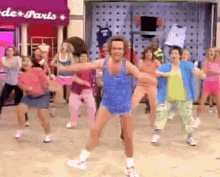

- Real Data examples of joining, split, and combine
- Shared value combination
- Pivot/transpose data


In [ ]:
import pandas as pd

### Joining with Real Data

The City of Pittsburgh publishes [data about incoming 311 requests on the WPRDC](https://data.wprdc.org/dataset/311-data). These are basically non-emergency service requests for things like abandoned vehicles, potholes, and dumpsters on fire. The data file `files/service_requests.csv` contains almost 300 thousand requests from the last few years.

In [ ]:
# load the 311 data
service_requests = pd.read_csv("files/service_requests.csv")
service_requests

Each service request has been categorized into a number of different categories in the column `REQUEST_TYPE`. We can use the `.unique()` method to get a list of all the various categories the 311 Response Center uses for incoming service requests.

In [ ]:
# look at all the unique values for REQUEST TYPE
service_requests["REQUEST_TYPE"].unique()

WOW! That is a lot of requests. To find out exactly how many we can wrap that code in the `len()` function.

In [ ]:
# how many unique request types are there?
len(service_requests["REQUEST_TYPE"].unique())

We can use the `.value_counts()` method to count the number of requests per type.

In [ ]:
# count the number of requests by their request type
service_requests["REQUEST_TYPE"].value_counts()

If we are trying to aggregating our data by these categories, 294 separate issues is still a lot of data! We can see the main offenders (POTHOLES!) 

Alongside the 311 request data, the City has also published a [311 Issue and Category Codebook](https://data.wprdc.org/dataset/311-data/resource/7794b313-33be-4a8b-bf80-41751a59b84a). This dataset maps the values in the `request_type` column ("Issues") with a set of higher level categories.

This is what is known as a "many-to-one" relationship. We have many Issues and they map to one Category.

In [ ]:
# load the 311 codebook data
code_book = pd.read_csv("files/311-codebook.csv")
code_book.head()

So now we can do some fancy merging magic. We know there is some overlap in the data column between the 311 requests and the codebook. Basically, the data in the `REQUEST_TYPE` column of the 311 data shares the same values as the `Issue` column of the code book.

In [ ]:
# create a new dataframe that merges the service requests with the code book 
merged_df = pd.merge(service_requests, code_book, left_on="REQUEST_TYPE", right_on="Issue")
merged_df.head()

Now we have a new dataframe that still represents individual service requests, but we have added a few columns (all the way on the right) that include data from the codebook (Category, Issue, Definition, Department, Public Access Level, and Suggested Action).

In [ ]:
# What are all the unique values for Category
merged_df["Category"].unique()

In [ ]:
# How many categories
len(merged_df["Category"].value_counts())

There are fewer options for Category, so when we aggregate all of the service requests by this column, we can see the overall picture a bit better.

In [ ]:
# Count the number of service requests for each category
merged_df["Category"].value_counts()

This is a much more comprehendable aggregation

By looking at the value counts for the `Department` column we can see who has their work cut out for them.

In [ ]:
# How many categories
merged_df["Department"].value_counts()

No surprises there!

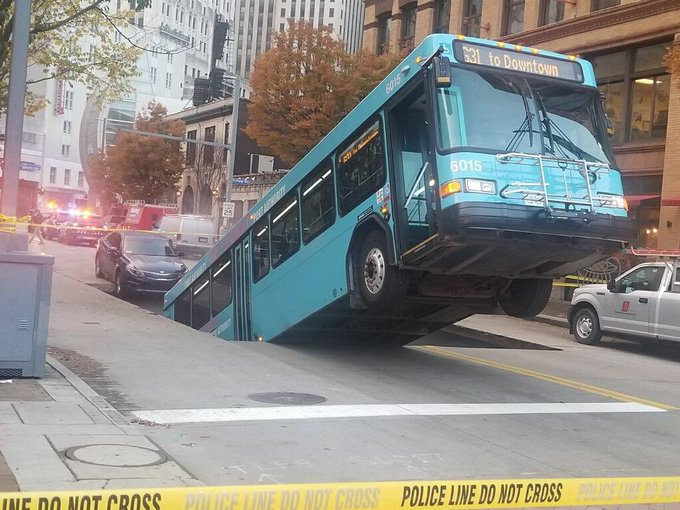

Source: [@PGHtransit](https://twitter.com/PGHtransit/status/1188798337169973249?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1188798337169973249%7Ctwgr%5E%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.wesa.fm%2Fdevelopment-transportation%2F2019-10-28%2Fsinkhole-opens-in-downtown-swallows-part-of-port-authority-bus-during-rush-hour)

## Split, Apply, Combine with Real Data

Let's try and analyze some real data about the all those staircases in Pittsburgh.

In [ ]:
# load the PGH steps data
steps = pd.read_csv("files/steps.csv")
steps.head()

With the data loaded into pandas we can start asking questions of our data

In [ ]:
# How many steps are there total in PGH?
steps["number_of_steps"].sum()

In [ ]:
# Count the number of staircases with each material type
steps['material'].value_counts()

What if we want to break this down by neighborhood?

In [ ]:
# group by neighborhood, then count the material types and display 50 values
steps.groupby("neighborhood")['material'].value_counts().head(50)

You could also use indexing to grab values for a particular neighborhood

In [ ]:
# group by neighborhood, then count the material types and display 50 values
steps.groupby("neighborhood")['material'].value_counts().loc['Greenfield']

In [ ]:
# What is the average number of steps
steps["number_of_steps"].mean()

In [ ]:
# What is the average number of steps by material
steps.groupby("material")['number_of_steps'].mean()

In [ ]:
# What neighborhood has the most number of steps
steps.groupby("neighborhood")["number_of_steps"].sum().sort_values(ascending=False)

In [ ]:
# What is the longest staircase by type per neighborhood
steps.groupby(["neighborhood", "material"])["number_of_steps"].max().head(50)

## The many ways to merge

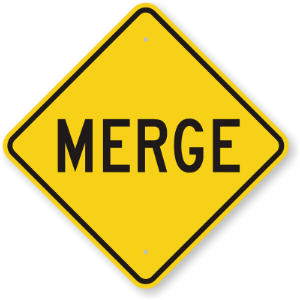


When you merge dataframes together with Pandas, there can be data that is not included in the newly formed Dataframe. Pandas provides four different modes for merging datasets. Depending on *how* you merge your data, there may be rows from one of the datasets not included after the merge.

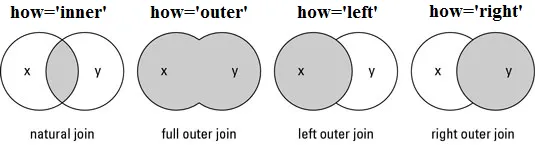

Source: [Data Science Made Simple](https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/)

### The Data

Let's start with three datasets this separate but overlapping information.

* Customers - This dataset contains information about who has been shopping at our store (id, name, address, etc.)
* Orders - This dataset contains information about (order id, customer id, amount, date)
* Returns - This dataset contains information about orders that have been returned (order id, customer id, etc.)


In [ ]:
# load customer data
df_customers = pd.read_csv('files/customers.csv')
df_customers

In [ ]:
# load order data
df_orders = pd.read_csv('files/orders.csv')
df_orders

In [ ]:
# load returns data
df_returns = pd.read_csv('files/returns.csv')
df_returns

### The inner merge
Sometimes the data all lines up correctly and Pandas does the merge correctly, getting the many to many or many to one alignment correct. Inner merge is the default merging behavior.

An inner merge will only return rows where there are values shared across both dataframes.

In [ ]:
# merge the orders and returns
pd.merge(df_orders, df_returns, on='order_id')

The above merge is considered a 'inner merge' because it combined data from both `df_orders` and `df_returns`, but only when there is a entry in both DataFrames for the column that's being joined upon (`order_id`). This creates a new DataFrame that contains information only about orders that were returned.

Pandas can also be told to do this join explicitly:

In [ ]:
pd.merge(df_orders, df_returns, on='order_id', how='inner')

### The outer merge

There are other types of merges.  The opposite of of an 'inner' merge is an 'outer' merge.  The outer merge will includes all the data from both DataFrames and use `NaN` when there is no shared value in the dataframes. 

In [ ]:
# merge order and returns using outer merge
pd.merge(df_orders, df_returns, on='order_id', how='outer')

In the above output you can see all order values AND return values are included. This creates a new dataframe about all orders and all returns. Notice, there was a return for an order (order_id 10) that doesn't have a purchase record. Someone is trying to scam us!

This could be useful, for instance if we are wanting to get a DataFrame of transactions.  Rather than order data, this could be books in a circulation dataset, where you have DataFrames for checkouts and returns.  

### The left merge

There are two other merges that are really useful.  These are merges where all items from one DataFrame can be included, and items from the second DataFrame are included if, and only if, there is a record in the second DataFrame that matches on the merge column.  Below is a 'left merge' this will include all items from the left DataFrame and only the data from the right DataFrame when it has values with order_id values that exist in the left DataFrame.

This allows for a DataFrame to be created that contains all orders including those that were returned:

In [ ]:
pd.merge(df_orders, df_returns, on='order_id', how='left')

### The right merge

Finally, there is a merge called... you guessed it... a 'right merge'. The is the same thing as the 'left' merge but in the opposite direction.  It takes all items from the right DataFrame and only the items in the left DataFrame where an order_id exists from the returned DataFrame.

In this example, the DataFrame is almost the same as the inner merge, except the DataFrame also contains data for a returned order that was not in the orders DataFrame.

In [ ]:
pd.merge(df_orders, df_returns, on='order_id', how='right')

## Transpose + Date Fitting and Merging

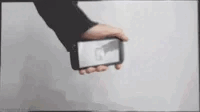

Sometimes data is not aligned the right away.  This is rare, but can happen.  Pandas provides mechanisms to rotate data, using a concept called *transpose*.

Let's look at an example that builds on the order/customer examples above.  In this case we are going to load a CSV that contains the tax rates for each decade that there were sales on the orders data.


In [ ]:
# load the tax data
df_tax = pd.read_csv('files/tax_rates.csv')
df_tax

You will notice that the decades are columns, not rows.  If we want merge this data with the orders data we will need to align the dates into columns.  We can do this with a the `transpose()` function.

In [ ]:
# rotate the tax data so columns become rows
df_tax_T = df_tax.transpose()
df_tax_T

Now we have the decades as rows, but they are set to the index.  This will make it difficult to perform computation on that column of data. We can demote it from being an index by using the function `reset_index()`. This will move the data from the row index into a column inside the dataframe and create a default numeric index.

In [ ]:
# reset the row index to make it a column in the dataframe
df_tax_T = df_tax_T.reset_index()
df_tax_T

Great.  Now we have two columns of values.  But, these column names don't make sense.  Let's use the `rename()` function to rename the columns. Use the `columns` parameter with a Python dictionary to map the old column names (the dictionary keys) to new column names (the dictionary values). This will let Pandas know we are renaming columns and not rows.

In [ ]:
# rename the columns with more humane names
df_tax_T = df_tax_T.rename(columns={'index': 'date', 0: 'rate'})
df_tax_T

Alright, let's continue down the path of getting the data to fit with our orders/customers DataFrame.  Let's check out the types of data for each column.  

In [ ]:
# check the data types of each column
df_tax_T.dtypes

Here we notice that the rate column is correct, with a type of `float`.  However, the date column is an `object` not a datetime type.  We can make it a date by using the function `to_datatime()`.  This is common transformation on needs to do as importing data from a CSV often results in date columns not being properly typed.  This will prevent you from using date-based computation on the data.

In [ ]:
# conver the date colum into datetime data type
df_tax_T['date'] = pd.to_datetime(df_tax_T['date'])
df_tax_T

In [ ]:
# check the data types
df_tax_T.dtypes

Nice!  We've now got the right data types.  We can no to getting our orders DataFrame ready to merge with this tax DataFrame.

### Datetime fitness

In the above tax DataFrame we have our date column as the first date of the decade.  We need to get a similar column in the orders table so that we have a common value to merge on.  To do this, we're going to do some datetime manipulations across data types.

Let's first remember what the orders DataFrame looks like:

In [ ]:
df_orders

In [ ]:
df_orders.dtypes

Again, we see the problem where the column data type is an `object`, e.g. a string.  We can use `to_datetime()` to change it to a datetime type. 

In [ ]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders

Once a `datatime` type we can use the datatime functions and computational tools.  For example, using the `.year` attribute to extract the year and place it into a new column.

In [ ]:
df_orders['order_year_date'] = pd.DatetimeIndex(df_orders['order_date']).year
df_orders

Excellent!  Now, let's do some data manipulation with some math to make our order years now order decades.  We can do this through computational manipulation.  We can first, divide the year values by 10, then convert them to a whole number (integer) and then multiply by 10.  This drops the least significant years place.

In [ ]:
df_orders['order_decade_date'] = (df_orders['order_year_date'] / 10).astype(int) * 10
df_orders

Now, just as we did with the tax DataFrame, we can convert the year to a `datatype` type.  To do this, we first want to have the year column as a string, so that the `to_datetime()` function knows what type of data we are providing.  Then we can call that function on the column.

In [ ]:
df_orders['order_decade_date'] = df_orders['order_decade_date'].astype(str)
df_orders

In [ ]:
df_orders['order_decade_date'] = pd.to_datetime(df_orders['order_decade_date'])
df_orders

Now we can perform our merge!  We are going to use a left merge with df_orders in the left position.  This way, we make sure we get all of our order data, even if we don't have corresponding tax data.

In [ ]:
df_combine = pd.merge(df_orders, df_tax_T, left_on='order_decade_date', right_on='date', how='left')
df_combine

What to do with the missing data?  There are a lot of reasonable approaches.  In below shows how you can take the mean of the tax rates and use that for the missing values.  We can fill in the missing values using the `fillna()` function.

In [ ]:
df_combine['rate'] = df_combine['rate'].fillna(df_tax_T['rate'].mean())
df_combine

Alright!  Now, let's use the amount column and the tax rate to calculate the amount with tax.  We first need to convert our string typed amount data to a float type.  To do this, we first need to clean up the string by removing the `$` sign.  We can use the `str.replace()` function to do this.  We can, in the same statement, also set the type to float.

In [ ]:
df_combine['amount'] = df_combine['amount'].str.replace('$','', regex=False).astype(float)
df_combine

Now all that's left is to do the math to calculate the amount with tax

In [ ]:
df_combine['amount_with_tax'] = df_combine['amount'] * ((df_combine['rate'] / 100) + 1)
df_combine

## Pivot tables

Sometimes you get what is called "long" or "stacked" data (streaming values from an instrument or periodic observational data). Data in this shape can be difficult to analyze.

In [ ]:
df_covid = pd.read_csv('files/covid_19_testing_cases.csv')
df_covid.head()

In [ ]:
df_covid.shape

These data are looooooong, Each row represents Covid case data in Allegheny County one case at a time. Given this shape it is possible to do some calculations, but it might make more sense to pivot the data so that each column.  For example, being able to look at number of cases in the ICU by demographic breakdowns.

Let's take a look at the ICU column and see what type of data this is.

In [ ]:
df_covid['icu_flag'].unique()

This data is in string form.  It would be better if we transformed this data into numeric form.  We can do this with existing functions of `replace()` and `astype()`:

In [ ]:
df_covid['icu_as_int'] = df_covid['icu_flag'].replace({'N': '0', 'Y': '1'}, regex=False)
df_covid['icu_as_int'] = df_covid['icu_as_int'].astype(int)
df_covid.head()

Now we're ready... let's PIVAAT!

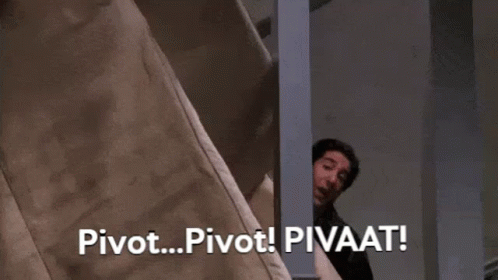

A pivot allows us to specify how we want to break down the data.  We specify `values` these are the data values we want to be in the table. We also specify an `aggfunc` which indicates how those `values` should be aggregated (in the case below we are asking for the sum, or the total number of ICU cases in the data set).  We also specify an `index`. This is the pivot table secret sauce, this is how we want the columns to be grouped as rows.

In [ ]:
pivoted_covid_data = df_covid.pivot_table(values='icu_as_int', # these values will populate the table
                                          index="age_bucket", # these values will be rows
                                           aggfunc={'icu_as_int': 'sum'} # these are the ways we want to aggregate on the pivoted data
                         )
pivoted_covid_data.head(10)

The above pivot table provides the total number of ICU cases per age group.  We can also add values to the table, using the same pivot breakdown but with different aggregator functions.

In [ ]:
pivoted_covid_data = df_covid.pivot_table(values=['icu_as_int', 'icu_flag'], # these values will populate the table
                                          index="age_bucket", # these values will be rows
                                           aggfunc={'icu_as_int': 'sum', 'icu_flag': 'count'}
                         )
pivoted_covid_data.head(10)

You can also add to the index list of column.  This will perform a multi-level pivot.  Below we can add race to see the breakdown of ICU cases per race in each age group:

In [ ]:
pivoted_covid_data = df_covid.pivot_table(values=['icu_as_int', 'icu_flag'], # these values will populate the table
                                          index=['age_bucket', 'race'], # these values will be rows
                                           aggfunc={'icu_as_int': 'sum', 'icu_flag': 'count'}
                         )
pivoted_covid_data.head(60)

Just because you pivoted on the data doesn't mean you can't keep applying computation.  Let's use computation on a pivot table to see the ICU rates per age/race breakdown .  First let's see the pivot table again:

In [ ]:
pivoted_covid_data = df_covid.pivot_table(values=['icu_as_int', 'icu_flag'], # these values will populate the table
                                          index=['age_bucket', 'race'], # these values will be rows
                                           aggfunc={'icu_as_int': 'sum', 'icu_flag': 'count'}
                         )
pivoted_covid_data.head(7)

Now, let's create a new column in the pivot table, `rate_per_1000` that takes the number of reports divides by 1000 and then divides the total ICU count by that rate to get the number of covid cases per 1000 citizens within that race/age pivot:

In [ ]:
pivoted_covid_data['rate_per_1000'] = pivoted_covid_data['icu_as_int'] / (pivoted_covid_data['icu_flag'] / 1000)
pivoted_covid_data.head(60)